<a href="https://colab.research.google.com/github/tuomaseerola/emr/blob/master/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Chapter 4 Code

A Jupyter notebook with **code examples in R** for _Chapter 4_ of _Routledge_ book titled **[Music and Science – Guide to Empirical Music Research ](https://github.com/tuomaseerola/emr)** by [Tuomas Eerola](https://www.durham.ac.uk/staff/tuomas-eerola/), [Music and Science Lab]() at [Durham University](https://www.durham.ac.uk) and [Music and Science Lab](https://musicscience.net) scheduled to be published in 2023.

To run the code in your browser, open the file in Colab (click the icon "Open in Colab"). Alternatively, you can download the notebook and run it locally.

This notebook re-creates one graph in Chapter 4.

File `Chapter4.ipynb` | Version `11/9/2022` | [Back to Index](https://tuomaseerola.github.io/emr/)

---

## Example 4.1 Illustration of correlations

This data illustration different correlation coefficients by taking the inspiration from a study by Maruskin et al. (2012), who collected self-reports related to chills. As we don't have the access to the data, the correlations are created by simulating a multivariate normal distribution (see `generate_data.R`) just to illustrate the way the pattern of correlation changes. 

In [1]:
#### Libraries ------------------------------------------------
library(MASS)
library(ggplot2)
options(repr.plot.width = 6, repr.plot.height = 6) # Default plot size for Colab

#### define a function -------------------------------------
generate_data <- function(N=NULL,r=NULL,m_x=NULL,range_x=NULL,m_y=NULL,range_y=NULL){
  # Generate data
  out <- as.data.frame(mvrnorm(N, mu = c(0,0), 
                               Sigma = matrix(c(1,r,r,1), ncol = 2), 
                               empirical = TRUE))
  # Calculations to create multiplication and addition factors for mean and range of X and Y
  mx.factor <- range_x/6
  addx.factor <- m_x - (mx.factor*3)
  my.factor <- range_y/6
  addy.factor <- m_y - (my.factor*3)
  
  # Adjust so that values are positive and include factors to match desired means and ranges
  out$V1.s <- (out$V1 - min(out$V1))*mx.factor + addx.factor
  out$V2.s <- (out$V2 - min(out$V2))*my.factor + addy.factor
  return<-out
}

In [2]:
#### Correlations we want to simulate ------------------

N <- 362
r <- 0.32      # Desired correlation
d.mx <- 10     # Desired mean of X
d.rangex <- 17 # Desired range of X
d.my <- 10     # Desired mean of Y
d.rangey <- 17 # Desired range of Y


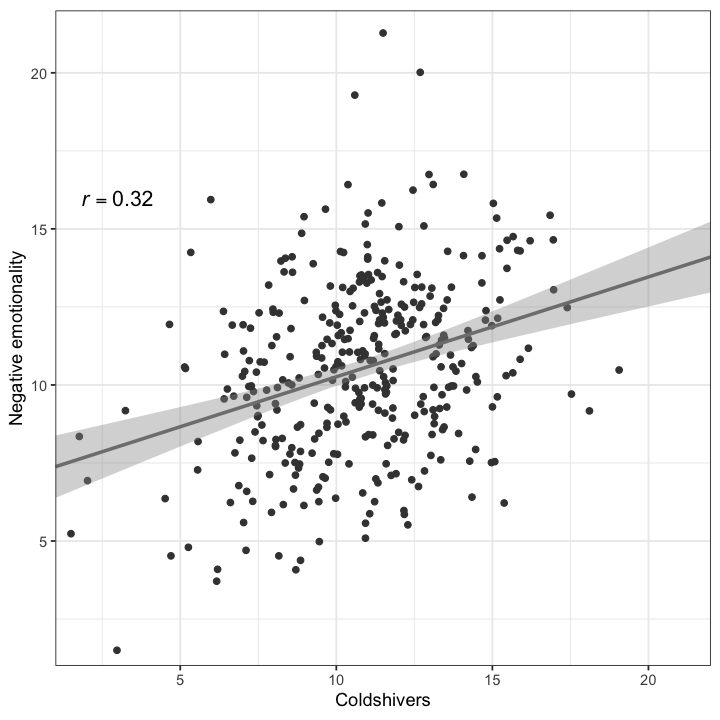

In [3]:
#### Coldshivers and negative emotionality  --------------
d1 <- generate_data(N, r, d.mx, d.rangex, d.my, d.rangey)

# Plot scatterplot along with regression line
g1 <- ggplot(d1, aes(x=V1.s, y=V2.s)) + 
  geom_point(colour='gray25') + 
  xlab('Coldshivers')+
  ylab('Negative emotionality')+
  annotate("text",x = 3.0, y=16,label = "italic(r)==0.32", parse=TRUE,size=4.5)+
  geom_smooth(formula = y ~ x, method='lm',color='gray50',fullrange=TRUE)+
  scale_x_continuous(limits = c(1,22),expand = c(0.00,0.00),breaks = seq(0,20,by=5))+
  scale_y_continuous(limits = c(1,22),expand = c(0.00,0.00),breaks = seq(0,20,by=5))+
  coord_fixed()+
  theme_bw()
print(g1)

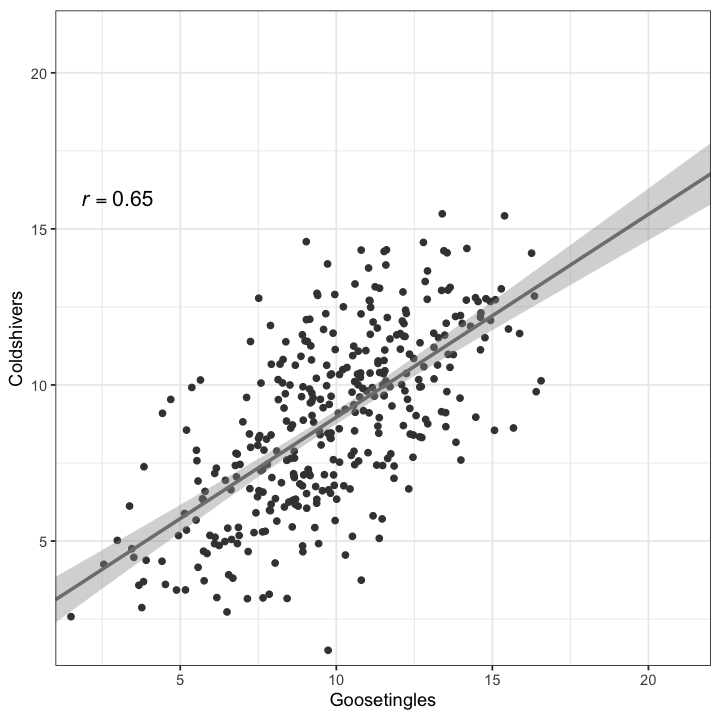

In [4]:
#### Coldshivers and Goosetingles  --------------
set.seed(101)
r <- 0.65 # Desired correlation
d2 <- generate_data(N, r, d.mx, d.rangex, d.my, d.rangey)
g2 <- ggplot(d2, aes(x=V1.s, y=V2.s)) + 
  geom_point(colour='gray25') + 
  xlab('Goosetingles')+
  ylab('Coldshivers')+
  annotate("text",x = 3.0, y=16,label = "italic(r)==0.65", parse=TRUE,size=4.5)+
  geom_smooth(formula = y ~ x, method='lm',color='gray50',fullrange=TRUE)+
  scale_x_continuous(limits = c(1,22),expand = c(0.00,0.00),breaks = seq(0,20,by=5))+
  scale_y_continuous(limits = c(1,22),expand = c(0.00,0.00),breaks = seq(0,20,by=5))+
  coord_fixed()+
  theme_bw()
print(g2)

Warning message:
“Removed 2 rows containing missing values (`geom_smooth()`).”


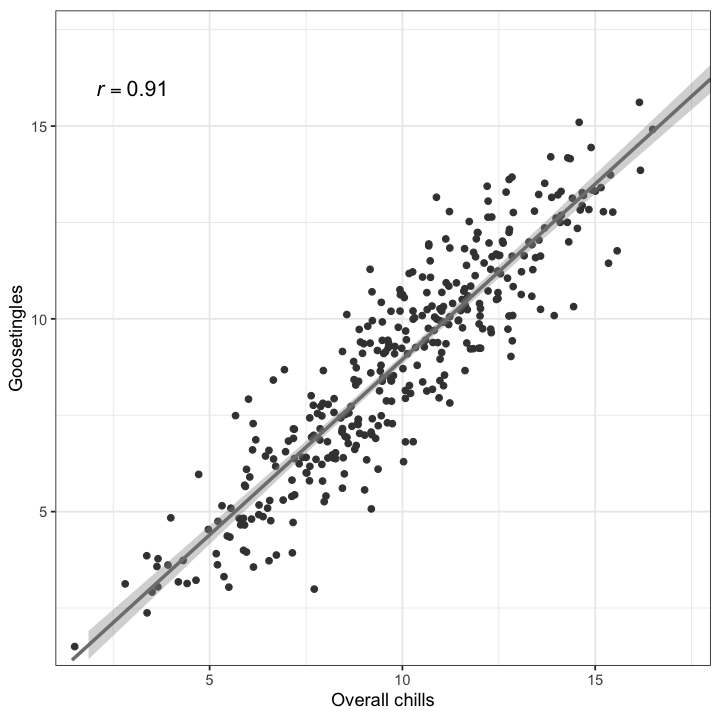

In [5]:
#### Overall chills and Goosetingles  --------------
set.seed(101)
r <- 0.91
d3 <- generate_data(N, r, d.mx, d.rangex, d.my, d.rangey)
# Plot scatterplot along with regression line
g3 <- ggplot(d3, aes(x=V1.s, y=V2.s)) + 
  geom_point(colour='gray25') + 
  xlab('Overall chills')+
  ylab('Goosetingles')+
  annotate("text",x = 3.0, y=16,label = "italic(r)==0.91", parse=TRUE,size=4.5)+
  geom_smooth(formula = y ~ x, method='lm',color='gray50',fullrange=TRUE)+
  scale_x_continuous(limits = c(1,18),expand = c(0.00,0.00),breaks = seq(0,20,by=5))+
  scale_y_continuous(limits = c(1,18),expand = c(0.00,0.00),breaks = seq(0,20,by=5))+
  coord_fixed()+
  theme_bw()
print(g3)

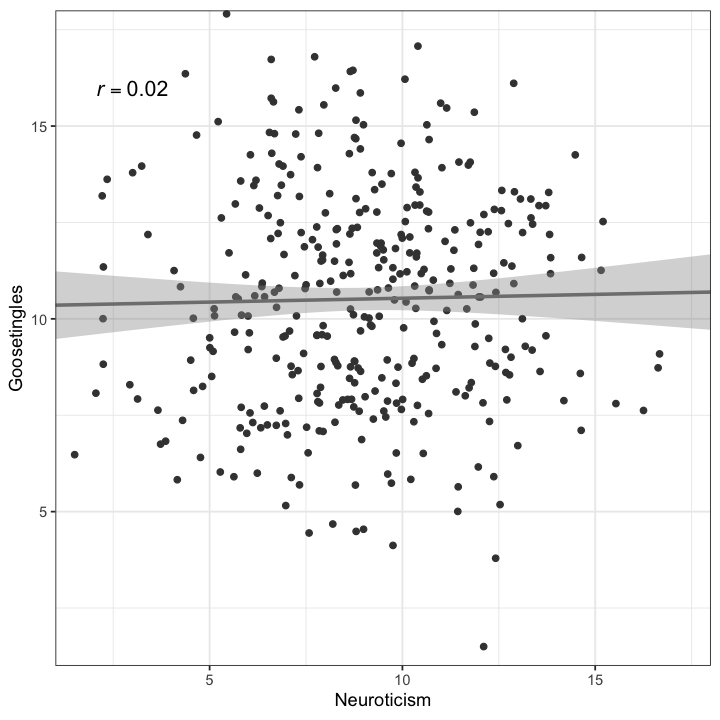

In [6]:
#### Neuroticism and Goosetingles  --------------
set.seed(101)
r <- 0.02
d4 <- generate_data(N, r, d.mx, d.rangex, d.my, d.rangey)
# Plot scatterplot along with regression line
g4 <- ggplot(d4, aes(x=V1.s, y=V2.s)) + 
  geom_point(colour='gray25') + 
  xlab('Neuroticism')+
  ylab('Goosetingles')+
  annotate("text",x = 3.0, y=16,label = "italic(r)==0.02", parse=TRUE,size=4.5)+
  geom_smooth(formula = y ~ x, method='lm',color='gray50',fullrange=TRUE)+
  scale_x_continuous(limits = c(1,18),expand = c(0.00,0.00),breaks = seq(0,20,by=5))+
  scale_y_continuous(limits = c(1,18),expand = c(0.00,0.00),breaks = seq(0,20,by=5))+
  coord_fixed()+
  theme_bw()
print(g4)

## Example 4.2 Meta-analysis

This recreates forest plot with a small sample of studies (10) from 105 experiments analysed by Cooper (2020).


Loading the 'metafor' package (version 4.0-0). For an
introduction to the package please type: help(metafor)




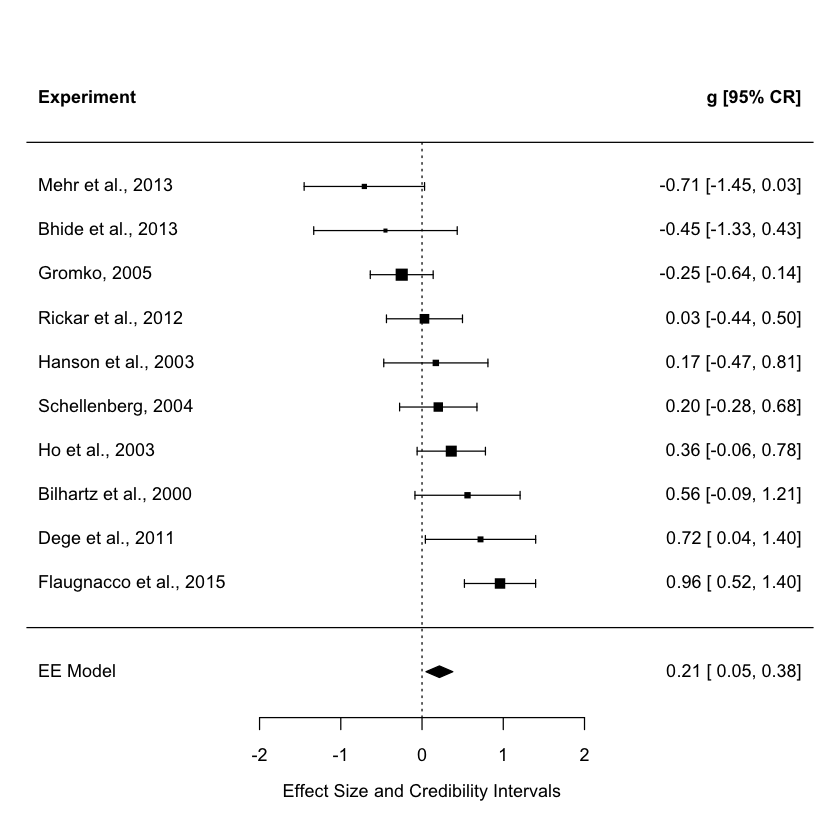

In [1]:
install.packages("metafor",quiet=TRUE)
library(metafor,quiet=TRUE)

# 10 example studies from Cooper 2020
dat <- data.frame(
  id = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10),
  yi = c(-0.71, -0.45, -0.25, 0.03, 0.17, 0.20, 0.36, 0.56, 0.72, 0.96),
  vi = c(0.143, 0.203, 0.039, 0.057, 0.107, 0.059, 0.046, 0.109, 0.12, 0.050),
  author = c("Mehr et al.", "Bhide et al.", "Gromko", "Rickar et al.", "Hanson et al.", "Schellenberg", "Ho et al.", "Bilhartz et al.", "Dege et al.", "Flaugnacco et al."),
  year = c(2013, 2013, 2005, 2012, 2003, 2004, 2003, 2000, 2011, 2015))

res.ee <- rma(yi, vi, data=dat, method="EE")

forest(res.ee, header=c("Experiment", "g [95% CR]"), top=2, xlab="Effect Size and Credibility Intervals",slab=paste(author, year, sep=", "),cex=0.9)


## References
- Cooper, P. K. (2020). It’s all in your head: A meta-analysis on the effects of music training on cognitive measures in schoolchildren. _International Journal of Music Education, 38(3)_, 321–336.
- Maruskin, L. A., Thrash, T. M., & Elliot, A. J. (2012). The chills as a psychological construct: Content universe, factor structure, affective composition, elicitors, trait antecedents, and consequences. _Journal of Personality and Social Psychology, 103(1)_, 135–157.
